<a href="https://colab.research.google.com/github/EdVKu/MeIA-2023/blob/main/Reto1_EduardoVazquezKuri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<DOCTYPE html>
<head>
<title>RETO 1</title>
<p>Para este primer reto, se usó un conjunto de datos de ciudades con más de 10,000 habitantes. A continuación se describirán los pasos usados para cumplir este reto:</p>

1. Obtención de E($\nu$), el valor esperado de distancia de cada ciudad $\nu$ respecto al resto

2. Obtención de $m(\nu),\ M(\nu)$, las distancias mínima y máxima.

3. Graficación de resultados

4. Obtención de la ciudad más "Frecuentemente cercana"
</head>
</html>


Para empezar, se extrajo el documento $\textit{.csv}$ (encontrado en el Github), se usó como delimitante la separación de $\textit{tabs}$ o separaciones grandes, al ser un archivo de tipo .tsv, y se descubrió que la primera fila (la cual tiene datos a operar) es usada como fila de nombres. Se agregaron los nombres $\{1,2,3,4\}$ para evitar esto. Finalmente, sólo se dejaron las columnas de valores de coordenadas, y la columna de nombres se extrajo para poder llevar a cabo el análisis de datos de manera más eficiente.

In [ ]:
import codecs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mx = pd.read_csv("/content/MX_ciudades.csv", delimiter = '\t', header = 0)
nombre = [1,2,3]
mx.columns = nombre
mx

nms = mx[3]
mx = mx.drop(3, axis=1)


mx

,1,2
0,0.623385,0.569956
1,0.608631,0.646459
2,0.592009,0.290783
3,0.577937,0.172304
4,0.668376,0.128981
...,...,...
1013,0.242132,0.476146
1014,0.597306,0.267320
1015,0.592559,0.292577
1016,0.671709,0.139424


Luego, se extrajeron las columnas de coordenadas en $x$ y en $y$, para entonces obtener, para cada ciudad $\nu_i$, la distancia entre $nu_i$ y $\nu_j$ con $i \neq j$. Obteniendo esta lista, se puede extraer también la distancia mínima y la máxima de manera instantánea. Sólo basta ordenarla y obtener el segundo y último elemento de esta.

In [ ]:
a,b=mx[1], mx[2]
Edist = []
dist2 = []
dist3 = []
p=0
t=0
h = 0
for p in range(1018):
  dist = []
  d2 = []
  for q in range(1018):
    dist.append(((a[p]-a[q])**2 + (b[p]-b[q])**2)**0.5)
  dist.sort()
  dist2.append(dist[1])
  dist3.append(dist[-1])
  Edist.append(np.sum(dist)/1017)

In [ ]:
nms2 = pd.DataFrame(nms)

nms2[4] = Edist
nms2[5] = dist2
nms2[6] = dist3

nms2.sort_values(by = 6)

,3,4,5,6
666,Vicente Guerrero,0.292700,0.012567,0.647548
672,Escuinapa de Hidalgo,0.299097,0.023123,0.650289
635,Juan Aldama,0.303889,0.001923,0.653081
677,Pueblo Nuevo,0.304384,0.002387,0.653716
824,Pueblo Nuevo,0.304515,0.002387,0.654217
...,...,...,...,...
973,Villa del Prado 2da Sección,0.853116,0.001243,1.282181
956,Pórticos de San Antonio,0.855212,0.002304,1.284287
778,Tijuana,0.856318,0.001042,1.285532
486,Tijuana,0.857013,0.001042,1.286215


Finalmente, se obtuvieron las gráficas. A continuación se presenta la gráfica de $E(\nu)$ contra $m(\nu)$:

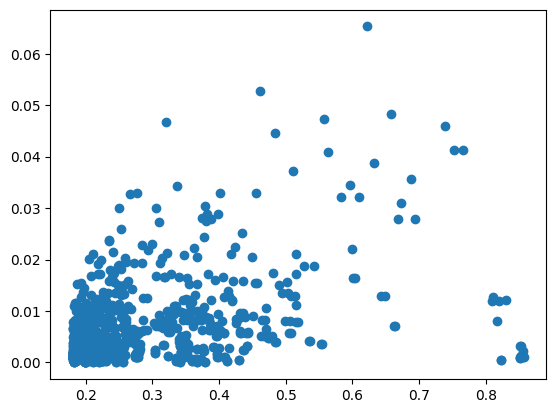

In [ ]:
plt.plot(nms2[4], nms2[5], 'o')

La de $E(\nu)$ contra $M(\nu)$:

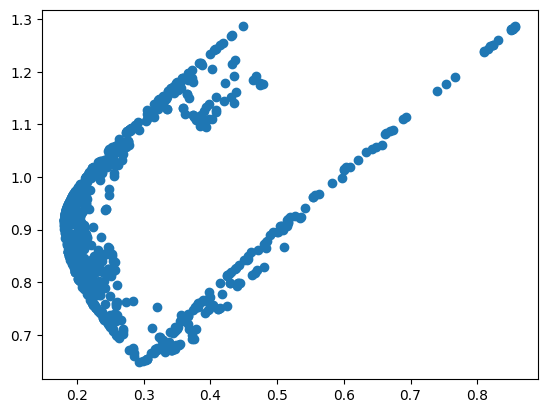

In [ ]:
plt.plot(nms2[4], nms2[6], 'o')

Y la de $m(\nu)$ contra $M(\nu)$:

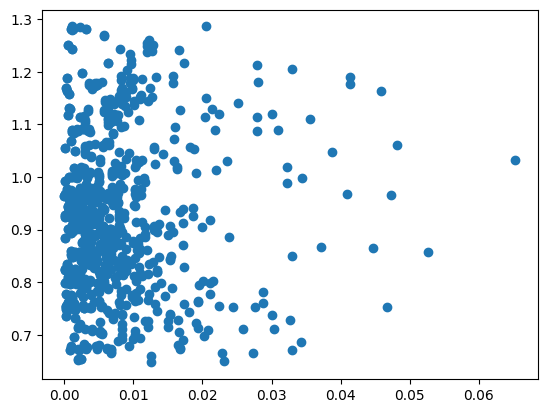

In [ ]:
plt.plot(nms2[5], nms2[6], 'o')